<a href="https://colab.research.google.com/github/bhupendrak9917/My-AI-Projects/blob/main/Animal-10_Streamlit/animal_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2


In [50]:
dir = 'datasattelite'

In [51]:
classes = ['MTU', 'Telangana sona', 'Tella hamsa']

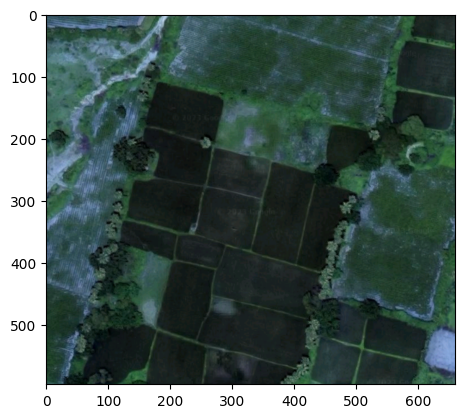

In [52]:
for cl in classes:
    path = os.path.join(dir, cl)
    for im_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, im_path))
        plt.imshow(img)
        break
    break

In [53]:
img.shape

(597, 660, 3)

In [54]:
dataset = []
for cl in classes:
    cls_num = classes.index(cl)
    path = os.path.join(dir, cl)
    for img in os.listdir(path):
        try:
            img = cv2.imread(os.path.join(path, img))
            resized_img = cv2.resize(img, (224,224))
            dataset.append([resized_img, cls_num])
        except Exception as e:
            pass

In [55]:
len(dataset)

30

In [56]:
random.shuffle(dataset)
for i in dataset[:10]:
    print(classes[i[1]])

Telangana sona
MTU
Telangana sona
MTU
Telangana sona
Telangana sona
Tella hamsa
Tella hamsa
MTU
Telangana sona


In [57]:
x =  []
y = []
for pic, label in dataset:
    x.append(pic)
    y.append(label)

In [58]:
x = np.array(x)

In [59]:
y = np.array(y)

In [60]:
print(type(x),x.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (30, 224, 224, 3)
<class 'numpy.ndarray'> (30,)


In [61]:
import tensorflow as tf
import sklearn
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [63]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24, 224, 224, 3) (6, 224, 224, 3) (24,) (6,)


In [64]:
def img_show(pic, label, index):
    plt.figure(figsize=(15,2))
    plt.imshow(pic[index])
    plt.xlabel(classes[label[index]], fontsize=10)

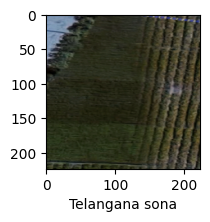

In [65]:
img_show(x_test, y_test, 5)

In [66]:
IMAGE_SHAPE = [224, 224]

In [67]:
vgg = VGG16(input_shape= IMAGE_SHAPE + [3], weights='imagenet', include_top=False)

In [68]:
for layer in vgg.layers:
    layer.trainable = False

In [69]:
x = Flatten()(vgg.output)
predictions = Dense(3, activation='softmax')(x)

In [70]:
model = Model(inputs = vgg.input, outputs = predictions)

In [71]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 8.4270 - accuracy: 0.2917
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 5.1162 - accuracy: 0.5417
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 5.4637e-07 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [73]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 1s 944ms/step - loss: 11.6115 - accuracy: 0.3333


[11.611492156982422, 0.3333333432674408]

In [74]:
p = model.predict(x_test)

1/1 [==============================] - 1s 928ms/step


In [75]:
print(np.argmax(p[0]))

0


In [76]:
classes[np.argmax(p[0])]

'MTU'

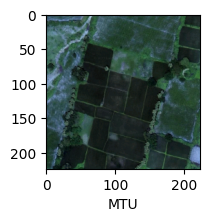

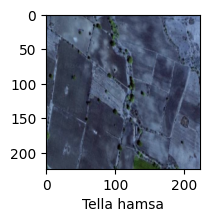

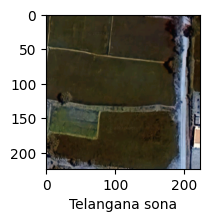

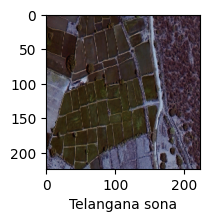

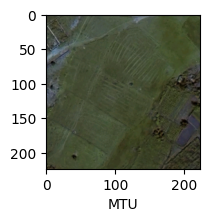

In [77]:
for i in range(5):
    img_show(x_test, y_test, i)

In [78]:
model.save('my_model.h5')

c:\Users\bharg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 266ms/step


'MTU'

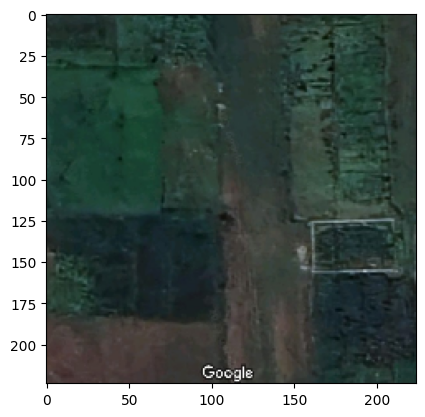

In [84]:
from keras.preprocessing import image
from keras.models import load_model
img1 = image.load_img('satellite.png', target_size= (224, 224))
plt.imshow(img1)
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
model = load_model('my_model.h5')
result_b = model.predict(img1)
classes[np.argmax(result_b[0])]